# Demographics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('../../curated data/DM_2020-09-04.csv')
df.head()

,STUDYID,DOMAIN,USUBJID,RFSTDTC,RFICDTC,DTHFL,SITEID,AGE,AGETXT,AGEU,SEX,RACE,ETHNIC,ARMCD,ARM,COUNTRY,DMDY
0,EJPDEJ,DM,8027,2014-03,NaN,NaN,CONAKRY,29.0,NaN,YEARS,M,NaN,NaN,NaN,NaN,GIN,1.0
1,EJPDEJ,DM,3315,2014-06,NaN,NaN,CONAKRY,70.0,NaN,YEARS,M,NaN,NaN,NaN,NaN,GIN,1.0
2,EJPDEJ,DM,1953,2014-11,NaN,NaN,CONAKRY,17.0,NaN,MONTHS,F,NaN,NaN,NaN,NaN,GIN,1.0
3,EJPDEJ,DM,9366,2014-11,NaN,Y,CONAKRY,80.0,NaN,YEARS,F,NaN,NaN,NaN,NaN,GIN,1.0
4,EJPDEJ,DM,6561,2014-11,NaN,NaN,CONAKRY,44.0,NaN,YEARS,F,NaN,NaN,NaN,NaN,GIN,1.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9472 entries, 0 to 9471
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STUDYID  9472 non-null   object 
 1   DOMAIN   9472 non-null   object 
 2   USUBJID  9472 non-null   int64  
 3   RFSTDTC  9406 non-null   object 
 4   RFICDTC  0 non-null      float64
 5   DTHFL    2538 non-null   object 
 6   SITEID   9472 non-null   object 
 7   AGE      9328 non-null   float64
 8   AGETXT   0 non-null      float64
 9   AGEU     9328 non-null   object 
 10  SEX      9472 non-null   object 
 11  RACE     0 non-null      float64
 12  ETHNIC   0 non-null      float64
 13  ARMCD    73 non-null     object 
 14  ARM      73 non-null     object 
 15  COUNTRY  9472 non-null   object 
 16  DMDY     5170 non-null   float64
dtypes: float64(6), int64(1), object(10)
memory usage: 1.2+ MB


The features are :

**STUDYID** : Study identifier

**DOMAIN** : Domain abreviation DM: Demographics

**USUBJID** : Unique Subject Identifier for a study

**SUBJID** : Subject Identifier (prodvided by data contributor) => Not present in the dataset

**RFSTDTC** : Reference Start Date/Time (the subject's first study encounter)
    
**RFICDTC** : Date and time the subject completed informed consent (getting permission before conducting a healthcare intervention) => No values

**DTHDTC** : Date and time of death for a subject who has died during the study period

**DTHFL** : Subject Death Flag

**SITEID** : Study Site Identifier

**INVID** : Investigator ID => Not present in the dataset

**BRTHDTC** : Date/Time of Birth => Not present in the dataset

**AGE** : Age (expressed in the units described in AGEU)

**AGETXT** : Age Text =>No values

**AGEU** : Age Units => (MONTHS, YEARS)

**SEX** : Sex => (F, M, U)

**RACE** : Race => No values 

**ETHNIC** : Ethnicity => No values

**ARM** : Description of Planned Arm (identifies the treatment arm)

**COUNTRY** : Country of the study site(SITEID)

**DMDTC** : Date/Time of Observation/Collection => Not present in the dataset 

**DMDY** : Study day of the observation relative to the date in RFSTDTC.

Drop features that have no values

In [29]:
df.drop(columns=['RFICDTC', 'AGETXT', 'RACE', 'ETHNIC'],inplace=True)

In [30]:
len(df[df.duplicated()])

0

### Study identifier

In [31]:
stdy_id_count = df['STUDYID'].value_counts()
stdy_id_count.sort_index(inplace = True)
stdy_id_count

EJPDEJ    2301
EOPNOJ     147
EORKWS      35
EQJJGF    1909
ERFCVU    2749
ESYADD     456
EUZJTB    1875
Name: STUDYID, dtype: int64

In [32]:
stdy_subid_count = df.groupby('STUDYID').USUBJID.nunique()
stdy_subid_count.sort_index(inplace = True)
stdy_subid_count

STUDYID
EJPDEJ    2301
EOPNOJ     147
EORKWS      35
EQJJGF    1909
ERFCVU    2749
ESYADD     456
EUZJTB    1875
Name: USUBJID, dtype: int64

We have exactly one observation per person

In [33]:
stdy_id_count.nunique()

7

We have 7 seven studies

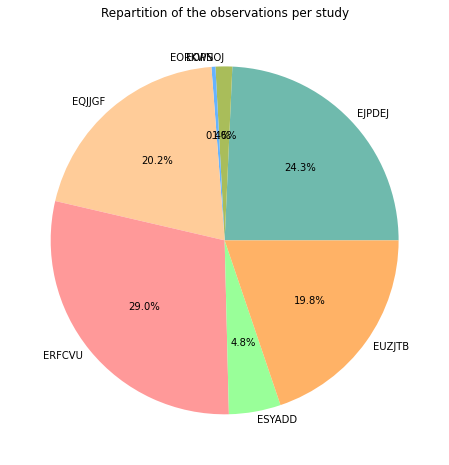

In [34]:
stdy_id_count.sort_index(inplace = True)

fig, ax = plt.subplots(figsize=(8,8))

colors = ["#6FBAaD",'#A9BD5A', '#66b3ff', '#ffcc99','#ff9999','#99ff99', "#ffb266"]

ax.pie(stdy_id_count.values,labeldistance=1.05, colors=colors, labels=stdy_id_count.index, autopct='%1.1f%%',
          startangle=0)

plt.title("Repartition of the observations per study")
plt.show()

###  Domain abreviation 

In [35]:
df['DOMAIN'].value_counts()

DM    9472
Name: DOMAIN, dtype: int64

### Unique Subject Identifier for a study

In [36]:
max(df['USUBJID'].value_counts())

1

We have only one record per subjet identifier.

In [37]:
df['USUBJID'].nunique()

9472

We have 9472 people.

### Reference Start Date/Time

We have some Nan values

In [38]:
df['RFSTDTC'].isna().sum()

66

In [39]:
df[df['RFSTDTC'].isna()]['STUDYID'].value_counts()

ERFCVU    33
EJPDEJ    29
EQJJGF     4
Name: STUDYID, dtype: int64

In [40]:
df[df['RFSTDTC'].isna()]['STUDYID'].value_counts()

ERFCVU    33
EJPDEJ    29
EQJJGF     4
Name: STUDYID, dtype: int64

In [41]:
from dateutil.parser import parse

df_date = df.loc[~df['RFSTDTC'].isna()]
df_date.loc[:,'RFSTDTC'] = df_date['RFSTDTC'].apply(lambda d: parse(d)).dt.to_period('M')

C:\Users\Ridha\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


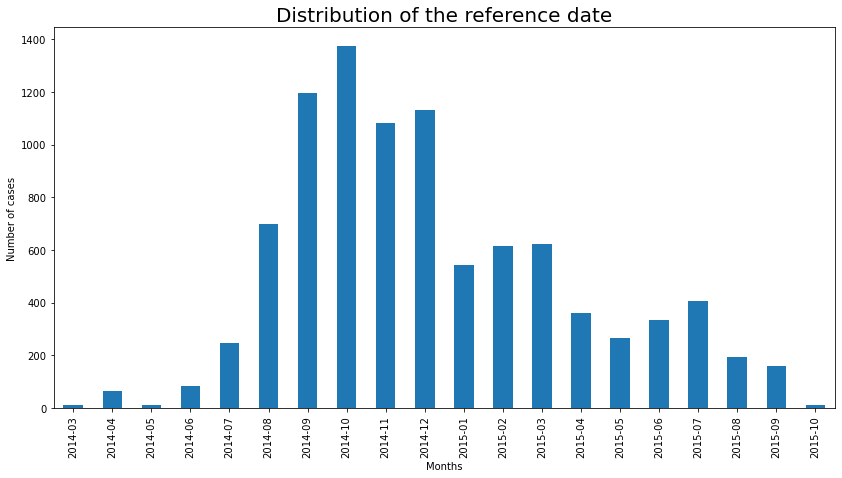

In [42]:
fig, ax = plt.subplots(figsize=(14,7))

df_date.loc[:,'RFSTDTC'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the reference date",size=20)
ax.set_xlabel('Months')
ax.set_ylabel('Number of cases')
plt.show()

See the real trends and data ? 

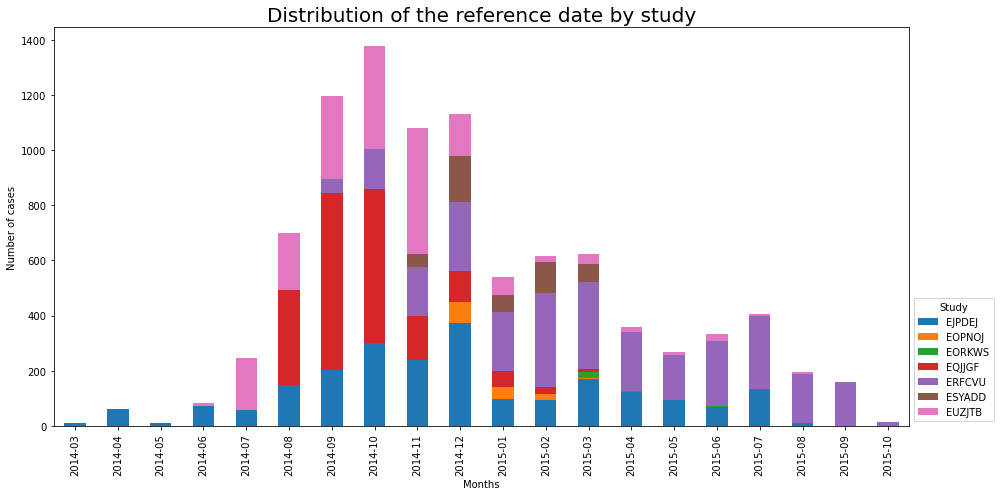

In [106]:
month_study = pd.DataFrame(df_date[['RFSTDTC','STUDYID']].groupby('RFSTDTC').STUDYID.value_counts().sort_index())
month_study.columns = ['count']
month_study.reset_index(inplace= True)
month_study = month_study.pivot(index='RFSTDTC', values='count', columns='STUDYID')

fig, ax = plt.subplots(figsize=(14,7))

month_study.plot(kind='bar',stacked=True,ax=ax )

plt.legend(loc="lower left", bbox_to_anchor=(1,0),title="Study")
ax.set_title("Distribution of the reference date by study",size=20)
ax.set_xlabel('Months')
ax.set_ylabel('Number of cases')

fig.tight_layout()
plt.savefig('ref_date.png', dpi=300)

plt.show()

#### Subject Death Flag

This variable contains information about whether the subject died during the study period. The variable is expected to be null if the choice is not "Yes". 

In [44]:
df['DTHFL'].value_counts()

Y    2538
Name: DTHFL, dtype: int64

In [45]:
df['DTHFL'].isna().sum()

6934

In [46]:
df['DTHFL'].fillna('N', inplace= True)
df['DTHFL'].value_counts()

N    6934
Y    2538
Name: DTHFL, dtype: int64

### Study Site Identifier

In [47]:
df['SITEID'].value_counts()

CONAKRY          2301
ELWA3            1909
MSF_Kail         1189
5-Makeni         1085
1-Bong            550
2-Lunsar          549
MSF_Bo            529
KERRY TOWN        456
3-Margibi         292
4-Kambia          273
MSF_Mag           157
CTE-NZEREKORE     147
203                34
201                 1
Name: SITEID, dtype: int64

In [48]:
country_dict = {"GIN": "Guinea", "LBR":"Liberia", "SLE":"Sierra Leone"}
df['COUNTRY'] = df['COUNTRY'].apply(lambda x: country_dict[x])

site_dict ={ 'CONAKRY': 'Conakry', 'CTE-NZEREKORE' : 'Nzerekore', 'ELWA3' : 'Monrovia (Eternal Love Winning Africa Hospital)',
             '1-Bong' : 'Bong County', '3-Margibi' : 'Margibi County','MSF_Kail' : 'Kailahun', '5-Makeni' : 'Makeni',
             '2-Lunsar' : 'Lunsar', 'MSF_Bo' :'Bo', 'KERRY TOWN' : 'Kerry Town', '4-Kambia' : 'Kambia', 'MSF_Mag' : 'Magburaka',
           '203' : 'Port Loko', '201' : 'Port Loko'}

df['CITIES'] = df['SITEID'].apply(lambda x: site_dict[x])

In [49]:
df_country_cities = pd.DataFrame(df.groupby(['COUNTRY']).CITIES.value_counts())
df_country_cities.columns = ['count']
df_country_cities

count
COUNTRY      CITIES                                                
Guinea       Conakry                                           2301
             Nzerekore                                          147
Liberia      Monrovia (Eternal Love Winning Africa Hospital)   1909
             Bong County                                        550
             Margibi County                                     292
Sierra Leone Kailahun                                          1189
             Makeni                                            1085
             Lunsar                                             549
             Bo                                                 529
             Kerry Town                                         456
             Kambia                                             273
             Magburaka                                          157
             Port Loko                                           35

In [50]:
df_stdy_country_cities = pd.DataFrame(df.groupby(['STUDYID','COUNTRY']).CITIES.value_counts())
df_stdy_country_cities.columns = ['count']
df_stdy_country_cities

count
STUDYID COUNTRY      CITIES                                                
EJPDEJ  Guinea       Conakry                                           2301
EOPNOJ  Guinea       Nzerekore                                          147
EORKWS  Sierra Leone Port Loko                                           35
EQJJGF  Liberia      Monrovia (Eternal Love Winning Africa Hospital)   1909
ERFCVU  Liberia      Bong County                                        550
                     Margibi County                                     292
        Sierra Leone Makeni                                            1085
                     Lunsar                                             549
                     Kambia                                             273
ESYADD  Sierra Leone Kerry Town                                         456
EUZJTB  Sierra Leone Kailahun                                          1189
                     Bo                                                 529
                     Magburaka                                          157

In [51]:
cities = ['Conakry', 'Nzerekore', 'Eternal Love Winning Africa Hospital', 'Bong County', 'Margibi County',
         'Kailahun', 'Makeni','Lunsar', 'Bo', 'Kerry Town', 'Kambia', 'Magburaka']

countries = ['Guinea','Guinea','Liberia','Liberia','Liberia','Sierra Leone','Sierra Leone','Sierra Leone','Sierra Leone',
            'Sierra Leone','Sierra Leone','Sierra Leone']

lat = [9.509167, 7.45, 6.3764, 6.835756, 6.527173, 8.280400, 
       8.873875, 8.688429, 7.964077, 8.262169, 9.125836, 8.718199]

long = [-13.712222, -8.49, -10.4885, -9.366905, -10.304583, 
        -10.571745, -12.037497, -12.535529, -11.742798, -13.090623, -12.917975, -11.951956]

cases = [2301, 147, 1909, 550, 292, 1189, 1085, 549, 529, 456, 273,157]

In [52]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)


df = pd.DataFrame(
    {'City': cities,
     'Country': countries ,
     'Latitude': lat,
     'Longitude': long})

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

# We restrict to Africa.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

ModuleNotFoundError: No module named 'geoplot'

Eternal Love Winning Africa Hospital is a hospital in Liberia located in the capital city Monrovia.

Aggregate over country. Rural vs Urban ? 

In [53]:
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


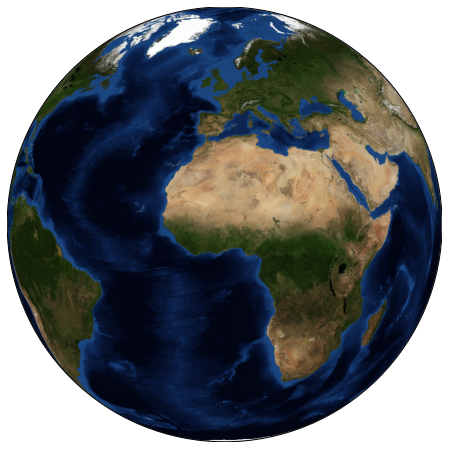

In [54]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=12.65, lon_0=0)
m.bluemarble(scale=0.5)

In [55]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [56]:
len(cases)

12

C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


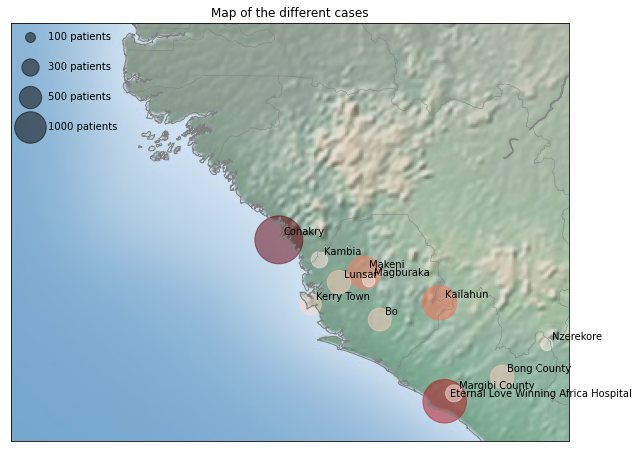

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='h',  
            lat_0=9.66, lon_0=-13.5,
            width=1200000,height=900000, ax=ax)

m.shadedrelief()
#m.bluemarble()
#m.etopo()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
#c=np.log10(population)
m.scatter(long, lat, latlon=True, s = cases, c = cases,
          cmap='Reds', alpha=0.5)

X, Y = m(long,lat)

# make legend with dummy points
for a in [100, 300, 500, 1000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' patients')
    
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=2, loc='upper left');

for i, (x, y) in zip(cities,zip(X, Y)):
    ax.annotate(str(i), (x,y), xytext=(5, 5), textcoords='offset points')
    
plt.title('Map of the different cases')
plt.show()

Eternal Love Wining Africa (ELWA3) is established and operated by Médecins Sans Frontières and is the largest tent-structured field ETU any medical or aid organization had ever built in response to a filovirus outbreak.

### AGE

In [58]:
df['AGE'].isna().sum() / len(df)

0.015202702702702704

Not a lot of missing values.

In [59]:
df[['AGE','AGEU']]

,AGE,AGEU
0,29.0,YEARS
1,70.0,YEARS
2,17.0,MONTHS
3,80.0,YEARS
4,44.0,YEARS
...,...,...
9467,40.0,YEARS
9468,37.0,YEARS
9469,13.0,YEARS
9470,65.0,YEARS


In [60]:
df['AGEU'].value_counts()

YEARS     9191
MONTHS     137
Name: AGEU, dtype: int64

In [61]:
df_age = df.loc[~df['AGE'].isna()]

In [62]:
def parse_age(row):
    if(row.AGEU == "MONTHS"):
        return int(row.AGE // 12)
    else:
        return int(row.AGE)

df_age.loc[:,'AGE_years'] = df_age.apply(lambda x : parse_age(x), axis = 1)

C:\Users\Ridha\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ridha\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
min(df_age['AGE'])

-1.0

In [64]:
df_age[df_age['AGE'] == -1 ]

,STUDYID,DOMAIN,USUBJID,RFSTDTC,DTHFL,SITEID,AGE,AGEU,SEX,ARMCD,ARM,COUNTRY,DMDY,CITIES,AGE_years
6811,ERFCVU,DM,3475,2015-07,N,5-Makeni,-1.0,YEARS,F,NaN,NaN,Sierra Leone,1.0,Makeni,-1


In [65]:
df_age = df_age[df_age['AGE'] != -1 ]
min(df_age['AGE'])

0.0

In [66]:
max(df_age['AGE_years'])

102

In [67]:
np.mean(df_age['AGE_years'])

30.118258818483973

In [68]:
np.median(df_age['AGE_years'])

29.0

In [69]:
df_age_stdy = df_age.groupby(['AGE_years','STUDYID']).USUBJID.count().unstack(fill_value=0)
df_age_stdy.head()

STUDYID,EJPDEJ,EOPNOJ,EORKWS,EQJJGF,ERFCVU,ESYADD,EUZJTB
AGE_years,,,,,,,
0,27,3,1,28,65,6,26
1,38,3,0,28,51,10,23
2,39,2,0,21,39,10,18
3,32,2,2,13,47,7,24
4,22,4,1,20,54,11,25


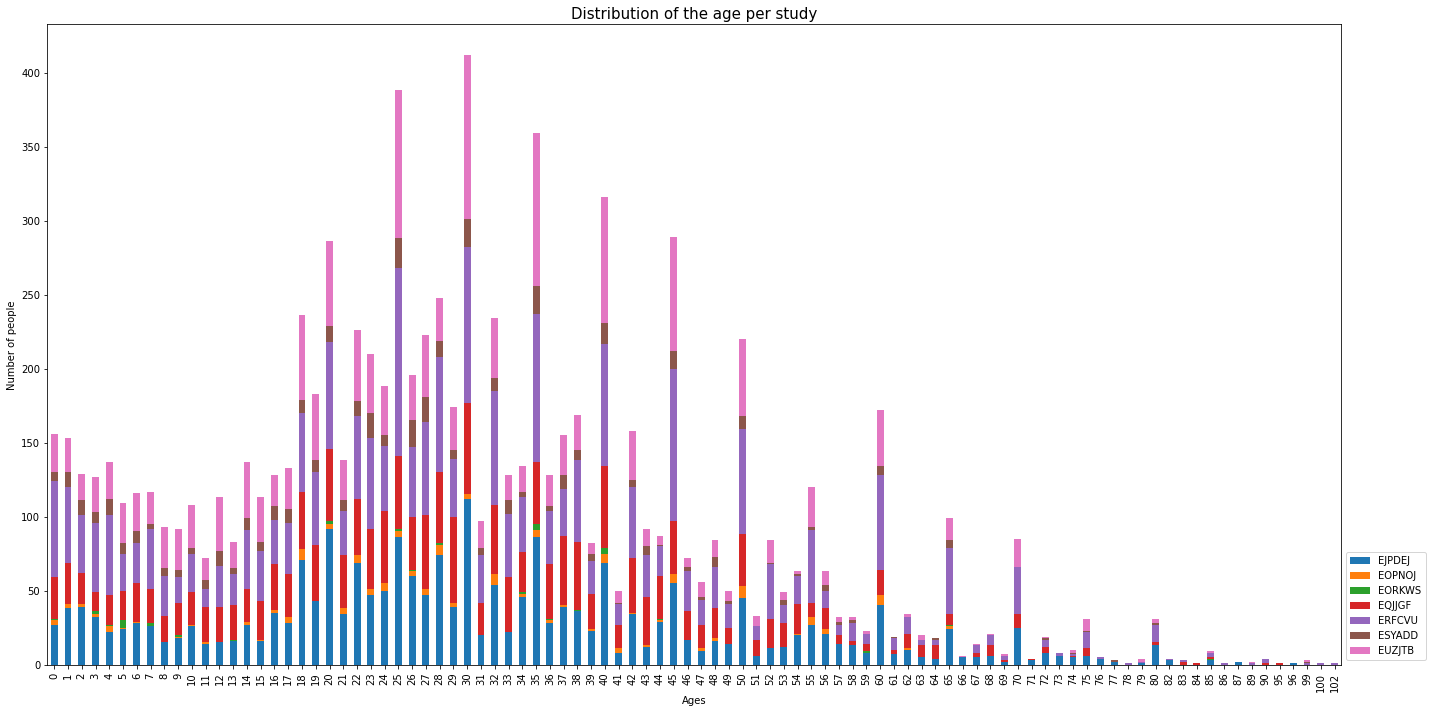

In [105]:
fig, ax = plt.subplots(figsize=(20,10))

df_age_stdy.plot(kind ="bar",stacked=True, ax=ax)

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distribution of the age per study",size=15)
ax.set_xlabel('Ages')
ax.set_ylabel('Number of people')

fig.tight_layout()
plt.savefig('age_stdy.png', dpi=300)

plt.show()

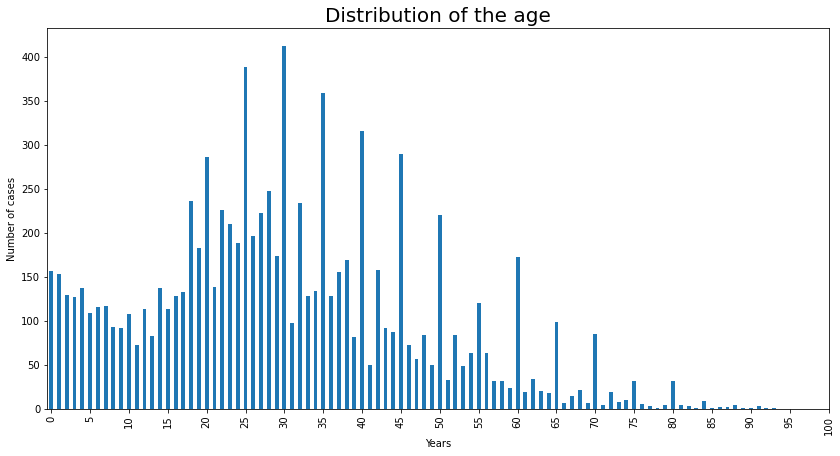

In [71]:
fig, ax = plt.subplots(figsize=(14,7))

df_age['AGE_years'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the age",size=20)
ax.set_xlabel('Years')
ax.set_ylabel('Number of cases')

xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(0, 100, 21, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
plt.show()

In [83]:
df_age['AGE_group'] = df_age['AGE_years'] // 10

In [100]:
df_age_death = df_age.groupby(['AGE_group','DTHFL']).USUBJID.count().unstack(fill_value=0)
df_age_death['Death_rate'] = df_age_death['Y'] / (df_age_death['Y'] + df_age_death['N'])
df_age_death

DTHFL,N,Y,Death_rate
AGE_group,,,
0,887,342,0.278275
1,1009,297,0.227412
2,1798,479,0.210365
3,1380,518,0.272919
4,850,404,0.322169
5,478,241,0.335188
6,275,135,0.329268
7,112,58,0.341176
8,40,13,0.245283


In [97]:
average_mortality_rate = sum(df_age_death['Y']) / (sum(df_age_death['Y']) + sum(df_age_death['N']))
average_mortality_rate

0.26675243915514096

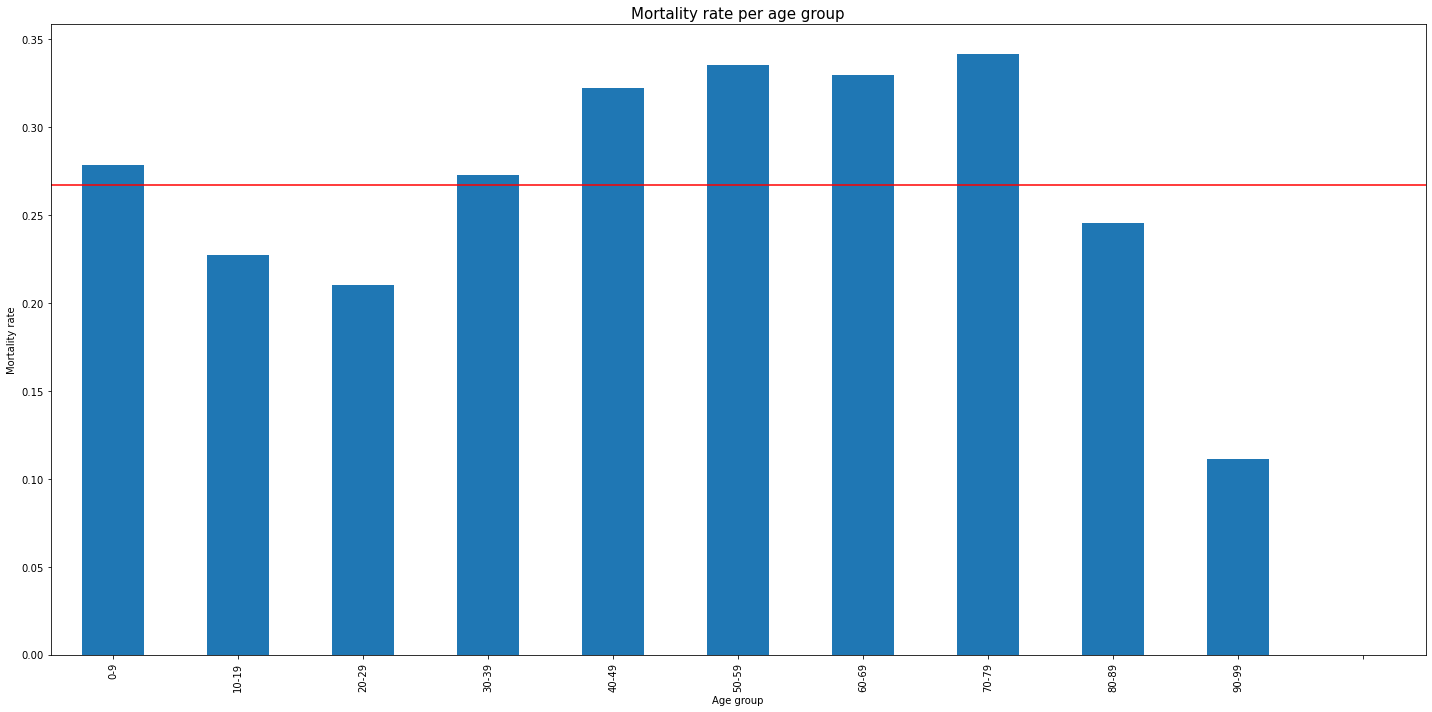

In [104]:
fig, ax = plt.subplots(figsize=(20,10))

df_age_death['Death_rate'].plot(kind ="bar",stacked=True, ax=ax)

ax.set_title("Mortality rate per age group",size=15)
ax.set_xlabel('Age group')
ax.set_ylabel('Mortality rate')

plt.xticks(np.arange(11), ('0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'))
plt.axhline(y=average_mortality_rate, color='r', linestyle='-', label = '0.26')

fig.tight_layout()
plt.savefig('mortality_rate.png', dpi=300)

plt.show()

### SEX

In [72]:
sex_count = df['SEX'].value_counts()
sex_count

M    5082
F    4338
U      52
Name: SEX, dtype: int64

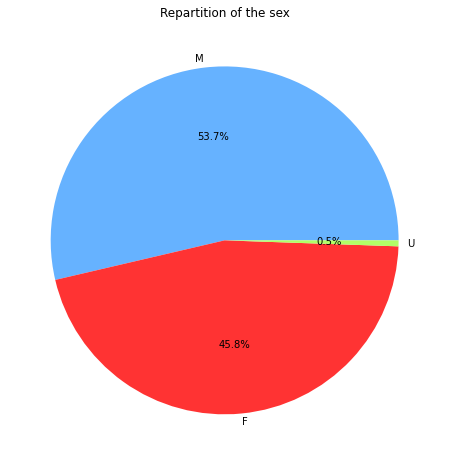

In [73]:
fig, ax = plt.subplots(figsize=(8,8))

colors = ["#66B2ff",'#ff3333', '#b2ff66']

ax.pie(sex_count.values,labeldistance=1.05, colors=colors, labels=sex_count.index, autopct='%1.1f%%',
          startangle=0)

plt.title("Repartition of the sex")
plt.show()

In [74]:
df_age_sex = df_age.groupby(['AGE_years','SEX']).USUBJID.count().unstack(fill_value=0)
df_age_sex.head()

SEX,F,M,U
AGE_years,,,
0,74,81,1
1,72,81,0
2,69,58,2
3,59,68,0
4,64,73,0


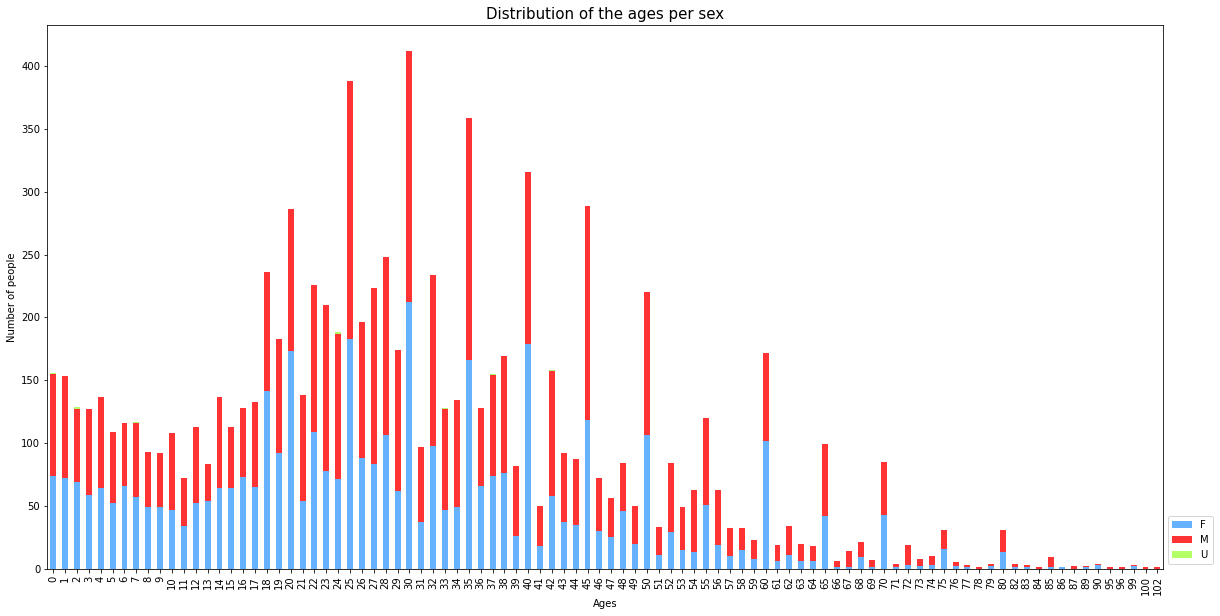

In [75]:
fig, ax = plt.subplots(figsize=(20,10))

df_age_sex.plot(kind ="bar",stacked=True, ax=ax, color= colors)

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distribution of the ages per sex",size=15)
ax.set_xlabel('Ages')
ax.set_ylabel('Number of people')

plt.show()

### Description of Planned Arm

In [76]:
df['ARM'].isna().sum()

9399

In [77]:
df_arm = df.loc[~df['ARM'].isna()]

In [78]:
df_arm['ARM'].value_counts()

FAVIPIRAVIR      54
TKM              14
Observational     3
ZMAPP             2
Name: ARM, dtype: int64

Exclusion cirteria ? 